
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [2]:

import numpy as np
import matplotlib.pyplot as plt


In [3]:
class StandardScalerManual:
    def fit(self, X):
      # Computing mean and standard deviation for each column
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
#pass
    def transform(self, X):
      # Applying the transformation: (x - mean) / std
      return (X - self.mean) / self.std
#pass
    def fit_transform(self, X):
      #  Combining fit and transform into one step for convenience
      self.fit(X)
      return self.transform(X)
      #pass

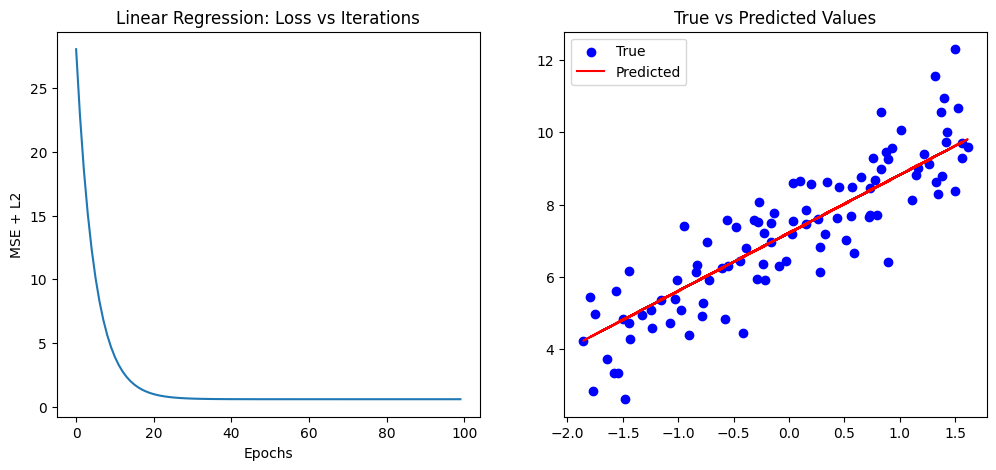

In [4]:
# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:  # 2. Linear Regression implementation

    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr  # Learning rate:It is the size of the step during gradient descent
        self.epochs = epochs  # Number of times to iterate over the entire dataset
        self.l2_lambda = l2_lambda  # Regularization strength (lambda)
        self.weights = None  # Slopes of the regression line
        self.bias = None  # Y-intercept of the regression line
        self.loss_history = []  # List to track the error over time

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initializing weights and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Linear Prediction: y = Xw + b
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculating Mean Squared Error(loss) with L2 Regularization
            mse_loss = (1 / (2 * n_samples)) * np.sum((y_predicted - y)**2)
            l2_loss = (self.l2_lambda / 2) * np.sum(self.weights**2)
            self.loss_history.append(mse_loss + l2_loss)  # Storing the current loss

            # Gradient descent- Calculating derivatives
            # dw = (1/n) * X.T * (error) + lambda * w
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Updating weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):  # Using known weights and bias to predict labels for new data
        return np.dot(X, self.weights) + self.bias

# Example Usage & Plotting
# Generating dummy data
X_lin = 2 * np.random.rand(100, 1)
y_lin = 4 + 3 * X_lin + np.random.randn(100, 1)
y_lin = y_lin.flatten()

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_lin)

model = LinearRegressionManual(lr=0.1, epochs=100, l2_lambda=0.1)
model.fit(X_scaled, y_lin)

# Plotting Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model.loss_history)
plt.title("Linear Regression: Loss vs Iterations")  #labelling the graph
plt.xlabel("Epochs")
plt.ylabel("MSE + L2")

# PlotTing Predictions
plt.subplot(1, 2, 2)
plt.scatter(X_scaled, y_lin, color='blue', label='True')
plt.plot(X_scaled, model.predict(X_scaled), color='red', label='Predicted')
plt.title("True vs Predicted Values")  #labelling the graph
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [5]:

#Implement sigmoid function as told in the lectures

def sigmoid(z):# The Sigmoid function maps any real value into a range between 0 and 1
    # Clips z to prevent overflow error if z is very large or very small
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))


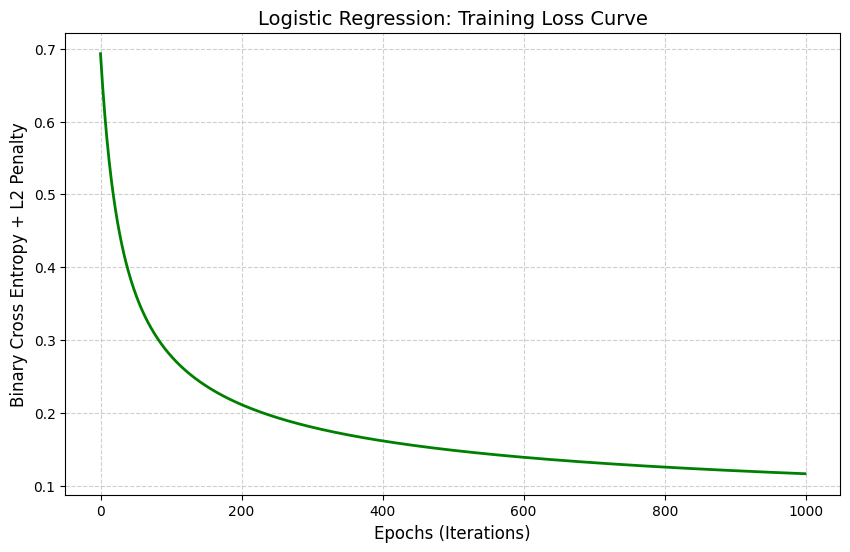

------------------------------
Final Training Accuracy: 100.00%
------------------------------


In [6]:

#Implement Logistic Regression from scratch and here also add the regularizaation term

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):  #initializing the values
        self.lr = lr  # Step size for optimization
        self.epochs = epochs  # Training iterations
        self.l2_lambda = l2_lambda  # Regularization strength
        self.weights = None # Parameters to learn
        self.bias = None # Offset parameter
        self.loss_history = [] # For tracking model convergence

    def fit(self, X, y):  #starting weights and biases to 0
        n_samples, n_features = X.shape  # Extract data shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Linear combination and activation
            model_line = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(model_line)

            # Binary Cross Entropy Loss + L2 Regularization
            epsilon = 1e-15   # Add epsilon(very small number) to log to avoid log(0)
            loss = - (1 / n_samples) * np.sum(y * np.log(y_predicted + epsilon) + (1 - y) * np.log(1 - y_predicted + epsilon))
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights**2)
            self.loss_history.append(loss + l2_penalty)

           # Gradient calculations for logistic regression
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (self.l2_lambda * self.weights / n_samples)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            #Updating the weights and biases
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):   # Returns the raw probability
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):   # Converts the probabilities to binary labels using a 0.5 threshold
        return [1 if i > 0.5 else 0 for i in self.predict_proba(X)]

 # Part 5- Reporting training loss curve and final accuracy

np.random.seed(42) # Generating Synthetic Data for Binary Classification
X_class = np.random.randn(200, 2) # We create two clusters of points (Class 0 and Class 1)
y_class = (X_class[:, 0] + X_class[:, 1] > 0).astype(int) # Create a linear boundary: y is 1 if x1 + x2 > 0, else 0, with some noise

scaler_logistic = StandardScalerManual() # Preprocessing Data
X_class_scaled = scaler_logistic.fit_transform(X_class) # Reusing the manual scaler from Question 1

# Initializing and Train the Model
# We set the learning rate, 1000 epochs, and a small L2 lambda for regularization
log_model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)

log_model.fit(X_class_scaled, y_class)
predictions = log_model.predict(X_class_scaled) # Generating predictions based on a 0.5 probability threshold
accuracy = np.mean(predictions == y_class) # Calculate Final Accuracy

# Plotting the Training Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(log_model.loss_history)), log_model.loss_history, color='green', linewidth=2)
plt.title("Logistic Regression: Training Loss Curve", fontsize=14)
plt.xlabel("Epochs (Iterations)", fontsize=12)
plt.ylabel("Binary Cross Entropy + L2 Penalty", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Reporting the results
print("-" * 30)
print(f"Final Training Accuracy: {accuracy * 100:.2f}%")
print("-" * 30)



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [7]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !

from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    rows, cols = M.shape  #for storing original dimensions
    # Flattenning M to a 1-D array for clustering individual values
    M_flat = M.flatten().reshape(-1, 1)

    # Using sklearn for this specific task
    kmeans = KMeans(n_clusters=k, max_iter=max_iters, n_init=10)
    labels = kmeans.fit_predict(M_flat)
    centroids = kmeans.cluster_centers_.flatten()  # Extracting the center value of each cluster

    # assignment_table- reshape the !D array ack to matrix of size M
    assignment_table = labels.reshape(rows, cols)

    # cookbook- dict -> cluster_id: list of (i, j) positions
    cookbook = {i: [] for i in range(k)}
    for r in range(rows):
        for c in range(cols):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))

    return assignment_table, cookbook, centroids   # Returning the label matrix, the coordinate map, and the cluster centers
'''
# Testing a value
M_test = np.random.rand(5, 5)
labels_table, mapping, centers = kmeans_matrix(M_test, k=3)

#Printing the matrix labels and cluster centres
print("Matrix Labels:\n", labels_table)
print("\nCentroids:\n", centers)  '''

'\n# Testing a value\nM_test = np.random.rand(5, 5)\nlabels_table, mapping, centers = kmeans_matrix(M_test, k=3)\n\n#Printing the matrix labels and cluster centres\nprint("Matrix Labels:\n", labels_table)\nprint("\nCentroids:\n", centers)  '


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
